In [13]:
import plotly.offline as pox
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import alpaca_trade_api as tradeapi
from alpaca_trade_api import TimeFrame, TimeFrameUnit
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from sklearn.tree import DecisionTreeClassifier
import time


In [14]:
SEC_KEY = 'IBpWZnzOVLT8nUNZMwbfWg9oV0sZrkAHPQYtsRFP'
PUB_KEY ='PKBEIUYRXMQIO5JXOBAJ'
BASE_URL ='https://paper-api.alpaca.markets'
api = tradeapi.REST(key_id= PUB_KEY, secret_key=SEC_KEY, base_url=BASE_URL) # For real trading, don't enter a base_url
df = api.get_bars("TSLA", TimeFrame(1, TimeFrameUnit.Day), "2016-01-01", "2022-01-01").df # Get one bar object for each of the past 5 minutes
df.reset_index(inplace=True)
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap
0,2016-01-04 05:00:00+00:00,230.72,231.38,219.00,223.41,6827146,69015,223.588147
1,2016-01-05 05:00:00+00:00,226.36,226.89,220.00,223.43,3186752,31300,223.139332
2,2016-01-06 05:00:00+00:00,220.00,220.05,215.98,219.04,3779128,33011,217.791187
3,2016-01-07 05:00:00+00:00,214.19,218.44,213.67,215.65,3554251,33417,216.042799
4,2016-01-08 05:00:00+00:00,217.86,220.44,210.77,211.00,3628058,32682,214.595420


In [15]:
df["close"] =  df['close']  * 100
df["high"]  =  df['high' ]  * 100
df["low"]   =  df['low'  ]  * 100

In [16]:
split_percentage = 0.8
split = int(split_percentage*len(df))
a =  df[split:]
a.to_csv('data.csv')

In [17]:
len(a)

303

In [18]:
df['future_returns'] = df['close'].pct_change().shift(-1)
signal=[]
for i in range(len(df)):
            if (df['future_returns'][i]  > 0):
                signal.append(1)
            elif (df['future_returns'][i] < 0):
                signal.append(0)
            else:
                signal.append(0)
df['signal']=signal
df['High - Close']=(df['high']- df["close"]).shift(-1)
df['Close - Low']=(df["close"]- df['low']).shift(-1)
df.dropna(inplace=True)
y = df[['signal']].copy()
X = df[['Close - Low','High - Close']].copy()

In [19]:
split_percentage = 0.8
split = int(split_percentage*len(df))
# Train data set
X_train = X[:split]
y_train = y[:split]
X_test =  X[split:]
y_test =  y[split:]
model= DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train['signal'])

# get start time
start_time = time.time()

# run the code
y_pred = model.predict(X_test)

# get end time
end_time = time.time()
# calculate elapsed time
elapsed_time = end_time - start_time
Accuracy =accuracy_score(y_test, y_pred)
print(Accuracy)
elapsed_time 

0.7516556291390728


0.014512300491333008

In [20]:
len(X_test)

302

In [21]:
# get start time
start_time = time.time()

# run the code
y_pred = model.predict(X_test)

# get end time
end_time = time.time()
# calculate elapsed time
elapsed_time = end_time - start_time

In [22]:
X_test.head()

,Close - Low,High - Close
1208,139.00,1031.00
1209,128.00,1944.00
1210,1324.99,225.59
1211,1028.00,548.00
1212,458.00,582.00


In [23]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,

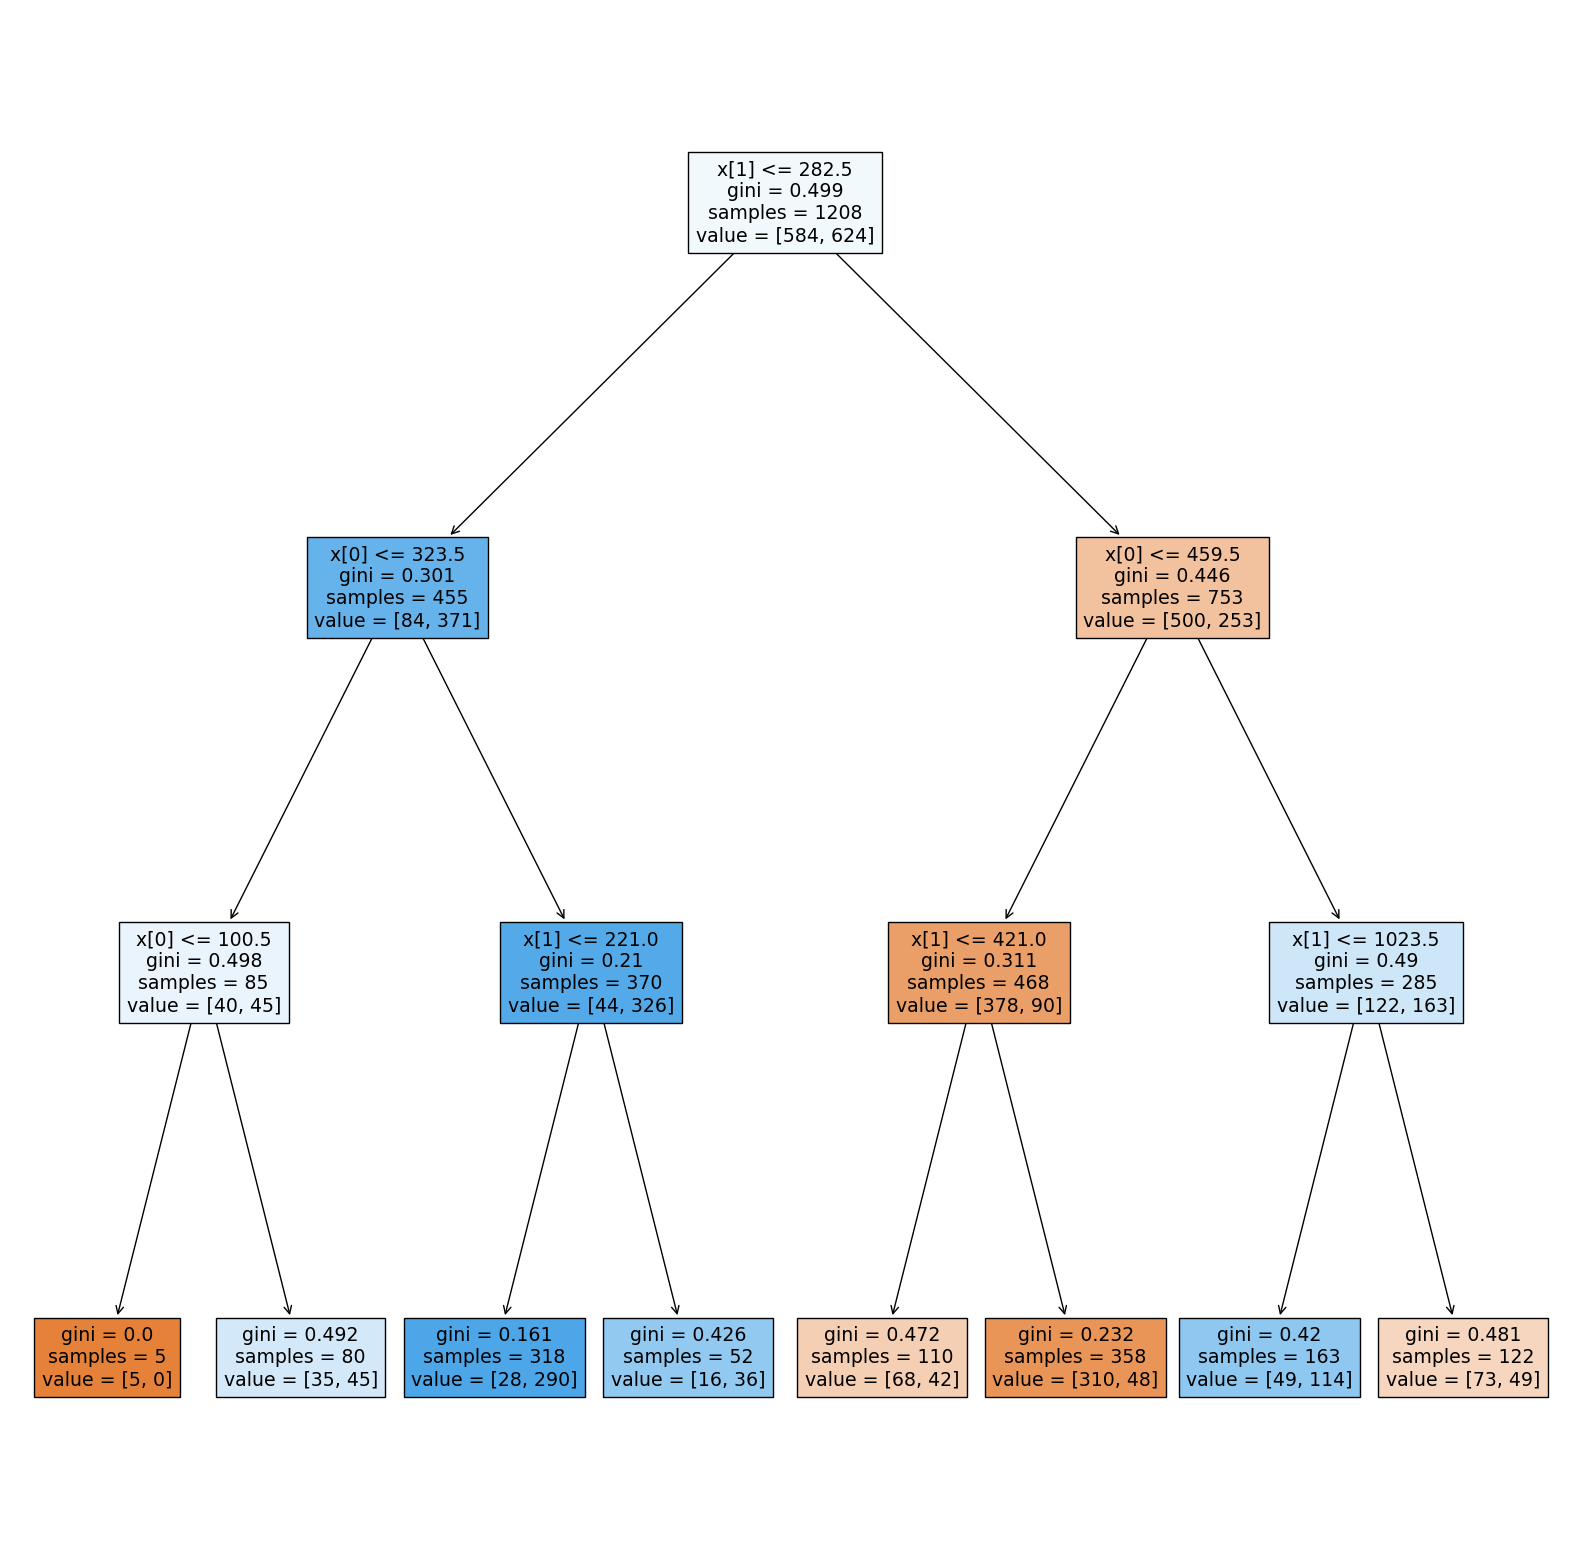

In [24]:
from sklearn import tree
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model, filled=True)